In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
dataset=pd.read_excel("Telco-Customer-Churn.xlsx")
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
churn=dataset[['customerID','gender','Churn']]
churn

,customerID,gender,Churn
0,7590-VHVEG,Female,No
1,5575-GNVDE,Male,No
2,3668-QPYBK,Male,Yes
3,7795-CFOCW,Male,No
4,9237-HQITU,Female,Yes
...,...,...,...
7038,6840-RESVB,Male,No
7039,2234-XADUH,Female,No
7040,4801-JZAZL,Female,No
7041,8361-LTMKD,Male,Yes


**1) Compare churn count with respect to gender.**

In [11]:
churn_yes=churn[churn['Churn']=='Yes']
churn_yes

,customerID,gender,Churn
2,3668-QPYBK,Male,Yes
4,9237-HQITU,Female,Yes
5,9305-CDSKC,Female,Yes
8,7892-POOKP,Female,Yes
13,0280-XJGEX,Male,Yes
...,...,...,...
7021,1699-HPSBG,Male,Yes
7026,8775-CEBBJ,Female,Yes
7032,6894-LFHLY,Male,Yes
7034,0639-TSIQW,Female,Yes


In [12]:
female=churn_yes[churn_yes['gender']=="Female"].count()
female['gender']

939

In [13]:
male=churn_yes[churn_yes['gender']=="Male"].count()
male['gender']

930

Ans.
churn count within female customer is 939 and 
churn count within male customer is 930


In [66]:
data4 = {"Gender":['Male', 'Female'],"Count":[930,939]};
dataFrame4 = pd.DataFrame(data=data4)
dataFrame4

,Gender,Count
0,Male,930
1,Female,939


Text(0.5, 1.0, 'Churn Count Comparisson')

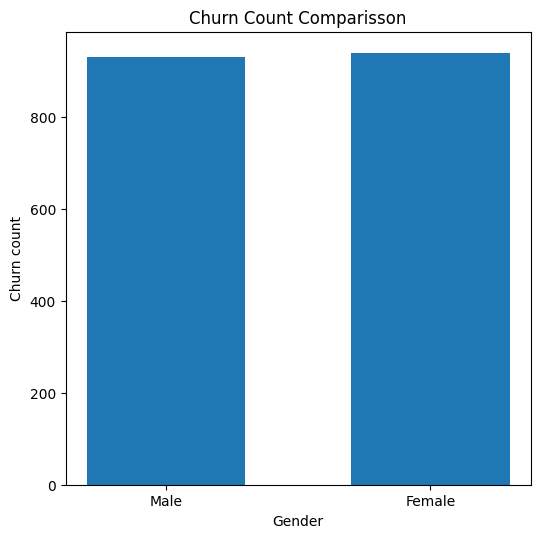

In [71]:
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
dx4=dataFrame4['Gender']
dy4=dataFrame4['Count']
dbar4=plt.bar(dx4,dy4,width=.6)
plt.xlabel("Gender")
plt.ylabel("Churn count")
plt.title("Churn Count Comparisson")

**2. Find out how many female senior citizens there in the dataset**

In [14]:
senior_citizen=dataset[(dataset['gender']=="Female")&(dataset['SeniorCitizen']==1)]
senior_citizen['gender'].count()

568

In [57]:
senior_citizen=dataset[(dataset['gender']=="Male")&(dataset['SeniorCitizen']==1)]
senior_citizen['gender'].count()

574

In [58]:
data3 = {"Gender":['Male', 'Female'],"Senior Citizen":[574,568]};
dataFrame3 = pd.DataFrame(data=data3)
dataFrame3

,Gender,Senior Citizen
0,Male,574
1,Female,568


Text(0.5, 1.0, 'Number of Senior Citizens within Total customers')

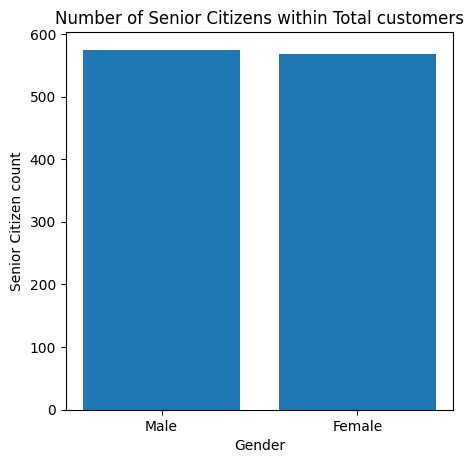

In [72]:
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
dx3=dataFrame3['Gender']
dy3=dataFrame3['Senior Citizen']
dbar3=plt.bar(dx3,dy3,width=.8)
plt.xlabel("Gender")
plt.ylabel("Senior Citizen count")
plt.title("Number of Senior Citizens within Total customers")

Ans. Total Number of senior citizens in female category is 568

***3) Compare 'tenure' with 'Total Charges' ***

In [15]:

charges=dataset[['tenure','TotalCharges']]
charges

,tenure,TotalCharges
0,1,29.85
1,34,1889.5
2,2,108.15
3,45,1840.75
4,2,151.65
...,...,...
7038,24,1990.5
7039,72,7362.9
7040,11,346.45
7041,4,306.6


In [16]:
charges.dtypes

tenure           int64
TotalCharges    object
dtype: object

In [17]:
charges['TotalCharges'] = pd.to_numeric(charges['TotalCharges'],errors = 'coerce')
charges.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


tenure            int64
TotalCharges    float64
dtype: object

In [18]:
charges.max()

tenure            72.0
TotalCharges    8684.8
dtype: float64

In [19]:
charges.mean()

tenure            32.371149
TotalCharges    2283.300441
dtype: float64

Text(0.5, 1.0, "Compare 'tenure' with 'Total Charges")

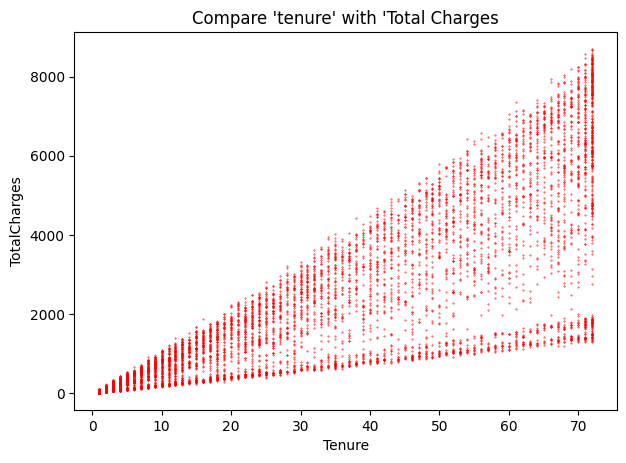

In [77]:
fig = plt.figure(figsize=(7,5), dpi=100)
plt.scatter(charges['tenure'],charges['TotalCharges'],color="red",s=.5,marker=".")
plt.xlabel("Tenure")
plt.ylabel("TotalCharges")
plt.title("Compare 'tenure' with 'Total Charges")


**4 Find out which contract preffered by the senior citizen**

In [21]:
pre_con=dataset[dataset['SeniorCitizen']==1]
pre_con['Contract']

20      Month-to-month
30            Two year
31      Month-to-month
34      Month-to-month
50      Month-to-month
             ...      
7023    Month-to-month
7029    Month-to-month
7031          One year
7032    Month-to-month
7041    Month-to-month
Name: Contract, Length: 1142, dtype: object

In [22]:
pre_con['SeniorCitizen'].count()

1142

In [23]:
label=[]
label=pre_con['Contract']
label=list(dict.fromkeys(label))
label

['Month-to-month', 'Two year', 'One year']

In [24]:
m2m=pre_con[pre_con['Contract']=='Month-to-month'].count()
m2m['Contract']

807

In [25]:
two_y=pre_con[pre_con['Contract']=='Two year'].count()
two_y['Contract']

145

In [26]:
one_y=pre_con[pre_con['Contract']=='One year'].count()
one_y['Contract']

190

In [54]:
data1 = {"Contract Type":['Month-to-month', 'Two year', 'One year'],"Count":[807,145,190]};
dataFrame2 = pd.DataFrame(data=data1)
dataFrame2

,Contract Type,Count
0,Month-to-month,807
1,Two year,145
2,One year,190


Text(0.5, 1.0, 'Preffered contract types with in senior citizen')

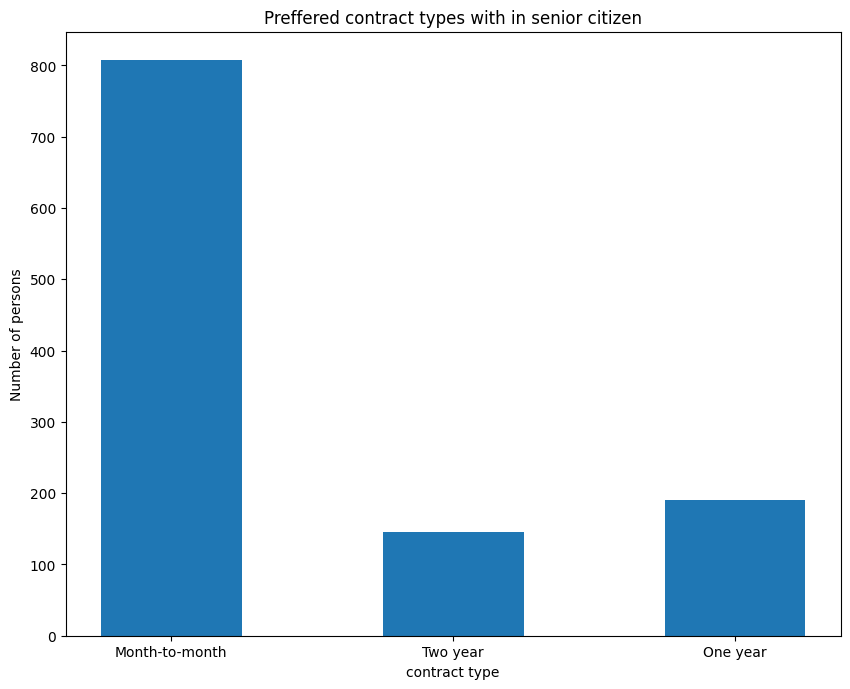

In [56]:
dx1=dataFrame2['Contract Type']
dy2=dataFrame2['Count']
dbar1=plt.bar(dx1,dy2,width=.5)
plt.xlabel("contract type")
plt.ylabel("Number of persons")
plt.title("Preffered contract types with in senior citizen")

Ans. Preferred contract within the senior citizen is Month-to-Month contract

**5 Comment your finds on Payment Method?**

In [27]:
payment=dataset[['customerID','gender','PaymentMethod']]
payment

,customerID,gender,PaymentMethod
0,7590-VHVEG,Female,Electronic check
1,5575-GNVDE,Male,Mailed check
2,3668-QPYBK,Male,Mailed check
3,7795-CFOCW,Male,Bank transfer (automatic)
4,9237-HQITU,Female,Electronic check
...,...,...,...
7038,6840-RESVB,Male,Mailed check
7039,2234-XADUH,Female,Credit card (automatic)
7040,4801-JZAZL,Female,Electronic check
7041,8361-LTMKD,Male,Mailed check


In [28]:
mod=[]
mod=payment['PaymentMethod']
mod=list(dict.fromkeys(mod))
mod

['Electronic check',
 'Mailed check',
 'Bank transfer (automatic)',
 'Credit card (automatic)']

In [29]:
EC=payment[payment['PaymentMethod']=='Electronic check'].count()
EC['PaymentMethod']

2365

In [30]:
MC=payment[payment['PaymentMethod']=='Mailed check'].count()
MC['PaymentMethod']

1612

In [31]:
BTA=payment[payment['PaymentMethod']=='Bank transfer (automatic)'].count()
BTA['PaymentMethod']

1544

In [32]:
CCA=payment[payment['PaymentMethod']=='Credit card (automatic)'].count()
CCA['PaymentMethod']

1522

Ans most of them are using Electronic check for making the paymnt


In [33]:
data = {"Payment_method":["Electronic check", "Mailed check", "Bank transfer (automatic)","Credit card (automatic)"],"Count":[2365,1612,1544,1522]};
dataFrame = pd.DataFrame(data=data)
dataFrame
                          

,Payment_method,Count
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


Text(0.5, 1.0, 'Preffered Payment Method by cutomers')

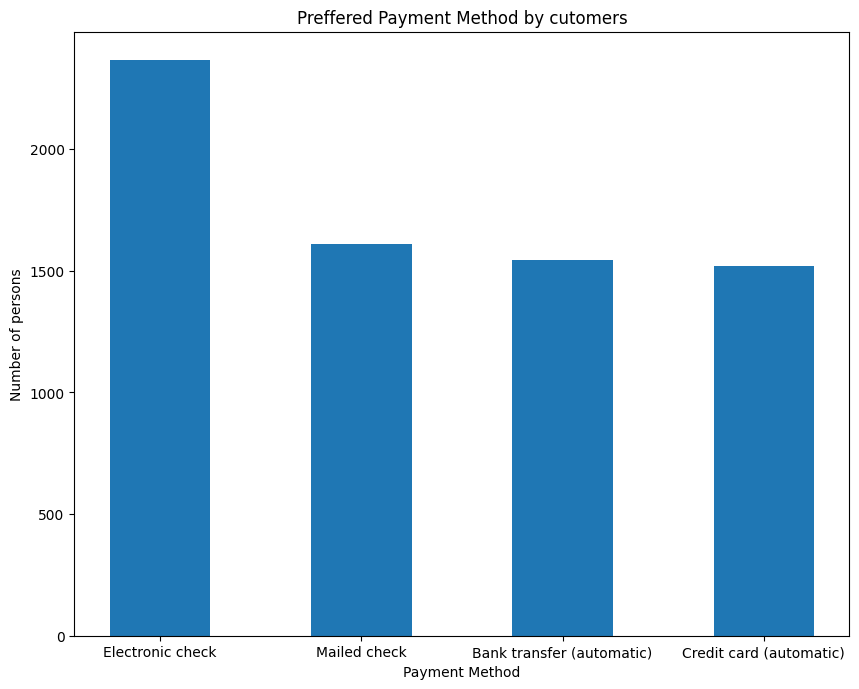

In [34]:
dx=dataFrame['Payment_method']
dy=dataFrame['Count']
dbar=plt.bar(dx,dy,width=.5)
plt.xlabel("Payment Method")
plt.ylabel("Number of persons")
plt.title("Preffered Payment Method by cutomers")

**Payment Method among Male customers**

In [35]:
p_male=payment[payment['gender']=="Male"]
p_male

,customerID,gender,PaymentMethod
1,5575-GNVDE,Male,Mailed check
2,3668-QPYBK,Male,Mailed check
3,7795-CFOCW,Male,Bank transfer (automatic)
6,1452-KIOVK,Male,Credit card (automatic)
9,6388-TABGU,Male,Bank transfer (automatic)
...,...,...,...
7033,9767-FFLEM,Male,Credit card (automatic)
7035,8456-QDAVC,Male,Bank transfer (automatic)
7038,6840-RESVB,Male,Mailed check
7041,8361-LTMKD,Male,Mailed check


In [36]:
EC_m=p_male[p_male['PaymentMethod']=='Electronic check'].count()
EC_m['PaymentMethod']

1195

In [37]:
MC_m=p_male[p_male['PaymentMethod']=='Mailed check'].count()
MC_m['PaymentMethod']

834

In [38]:
BTA_m=p_male[p_male['PaymentMethod']=='Bank transfer (automatic)'].count()
BTA_m['PaymentMethod']

756

In [39]:
CCA_m=p_male[p_male['PaymentMethod']=='Credit card (automatic)'].count()
CCA_m['PaymentMethod']

770

In [40]:
p_female=payment[payment['gender']=="Female"]
p_female

,customerID,gender,PaymentMethod
0,7590-VHVEG,Female,Electronic check
4,9237-HQITU,Female,Electronic check
5,9305-CDSKC,Female,Electronic check
7,6713-OKOMC,Female,Mailed check
8,7892-POOKP,Female,Electronic check
...,...,...,...
7034,0639-TSIQW,Female,Credit card (automatic)
7036,7750-EYXWZ,Female,Electronic check
7037,2569-WGERO,Female,Bank transfer (automatic)
7039,2234-XADUH,Female,Credit card (automatic)


In [41]:
EC_f=p_female[p_female['PaymentMethod']=='Electronic check'].count()
EC_f['PaymentMethod']

1170

In [42]:
MC_f=p_female[p_female['PaymentMethod']=='Mailed check'].count()
MC_f['PaymentMethod']

778

In [43]:
BTA_f=p_female[p_female['PaymentMethod']=='Bank transfer (automatic)'].count()
BTA_f['PaymentMethod']

788

In [44]:
CCA_f=p_female[p_female['PaymentMethod']=='Credit card (automatic)'].count()
CCA_f['PaymentMethod']

752

In [45]:
p_data = {"Payment_method":["Electronic check", "Mailed check", "Bank transfer (automatic)",
                            "Credit card (automatic)"],"Male":[1195,834,756,770],"Female":[1170,778,788,752],
          "Total":[2365,1612,1544,1522]};
dataFrame1 = pd.DataFrame(data=p_data)
dataFrame1

,Payment_method,Male,Female,Total
0,Electronic check,1195,1170,2365
1,Mailed check,834,778,1612
2,Bank transfer (automatic),756,788,1544
3,Credit card (automatic),770,752,1522


Text(0, 0.5, 'Number of customers')

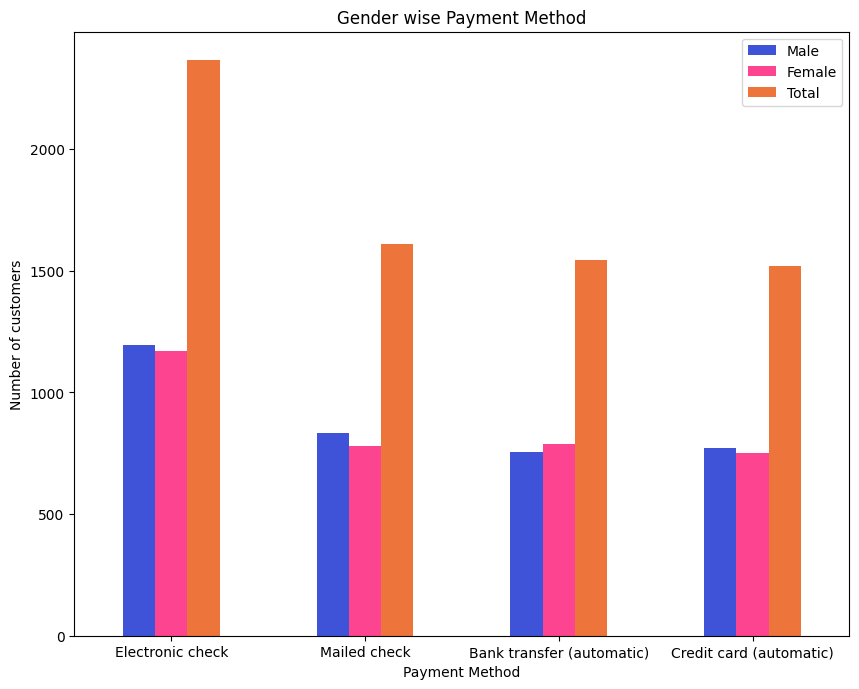

In [51]:
ax1=dataFrame1.plot.bar(x='Payment_method',rot=0,color={"Male": "#3f53d9", "Female": "#fc4491","Total": "#ed743b"},title="Gender wise Payment Method")
ax1.set_xlabel("Payment Method")
ax1.set_ylabel("Number of customers")
